<a href="https://colab.research.google.com/github/karim306/FASHION-MNIST/blob/main/clothesClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialize Environment**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# TensorFlow Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.utils import plot_model

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio

# Initialize Plotly offline mode
pio.renderers.default = 'notebook'


# **Unzip Data Set**

In [ ]:
# !unzip -q /content/sample_data/Fashion Mnist /archive.zip


In [ ]:
# IS_LOCAL = False

# import os

# if(IS_LOCAL):
#     PATH="../input/fashionmnist/"
# else:
#     PATH="/content/sample_data/input/"
# print(os.listdir(PATH))

# Reading data


In [ ]:
train_file ='/content/drive/MyDrive/Fashion Mnist/fashion-mnist_train.csv'
test_file  ='/content/drive/MyDrive/Fashion Mnist/fashion-mnist_test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# **Data exploration**

---



In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


***How many number of images are in each class. We start with the train set***

---



<ipython-input-5-442520ea0d2d>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




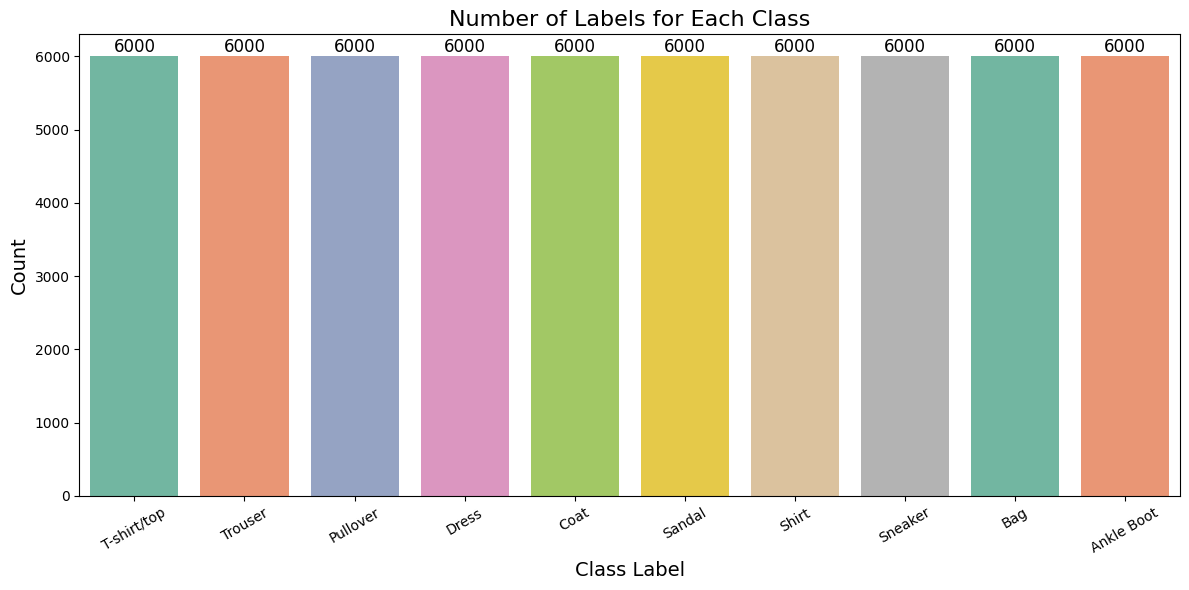

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary for human-readable labels
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


def plot_label_per_class(data):
    # Check if 'label' column exists in data
    if 'label' not in data.columns:
        raise ValueError("The DataFrame must contain a 'label' column.")

    # Create a count plot for labels
    plt.figure(figsize=(12, 6))
    label_counts = data['label'].value_counts().sort_index()

    # Plot the bar chart using Seaborn
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")

    # Set titles and labels
    plt.title("Number of Labels for Each Class", fontsize=16)
    plt.xlabel("Class Label", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(ticks=range(len(labels)), labels=[labels[i] for i in label_counts.index], rotation=30)

    # Annotate each bar with its label count
    for index, count in enumerate(label_counts.values):
        plt.text(index, count + 0.5, f'{count}', ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the function with the training data
plot_label_per_class(train_data)


In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128




def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


**plot some samples for the images**


---



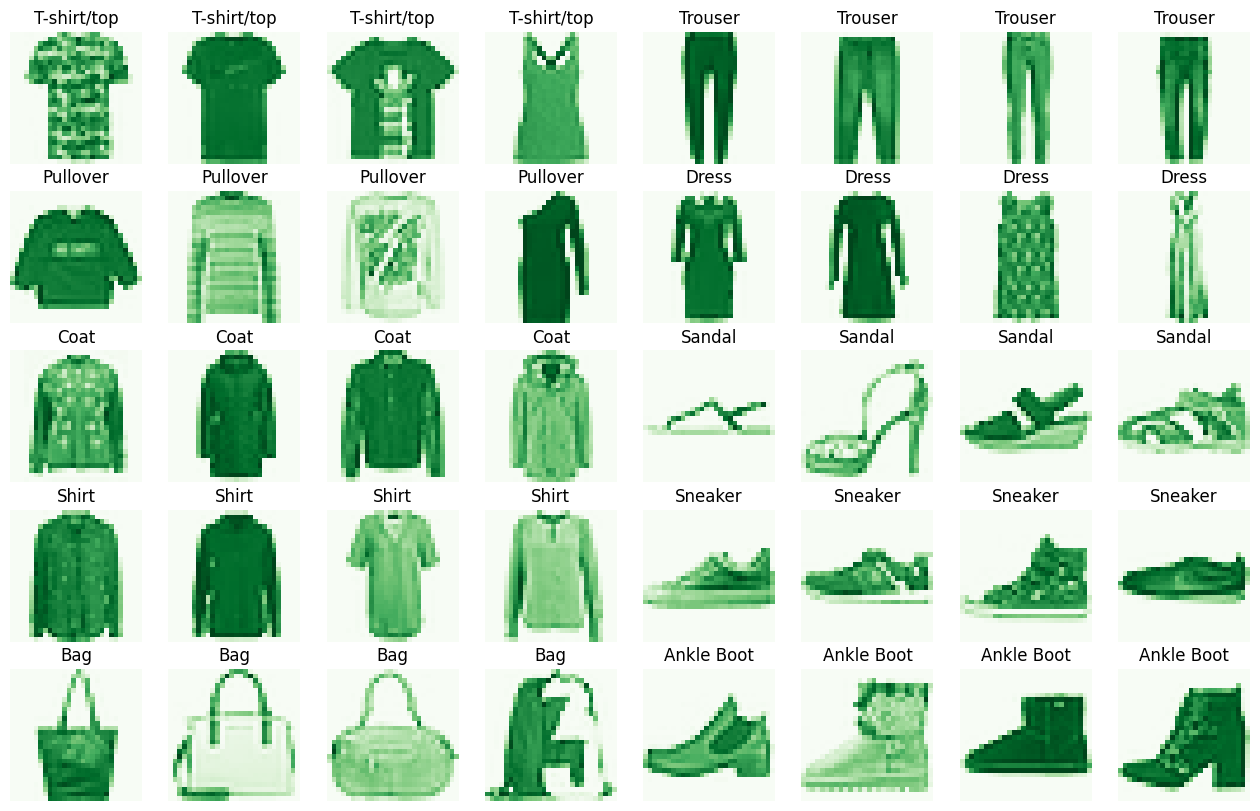

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

# **Plot Test set images**

Total number of sample images to plot:  40


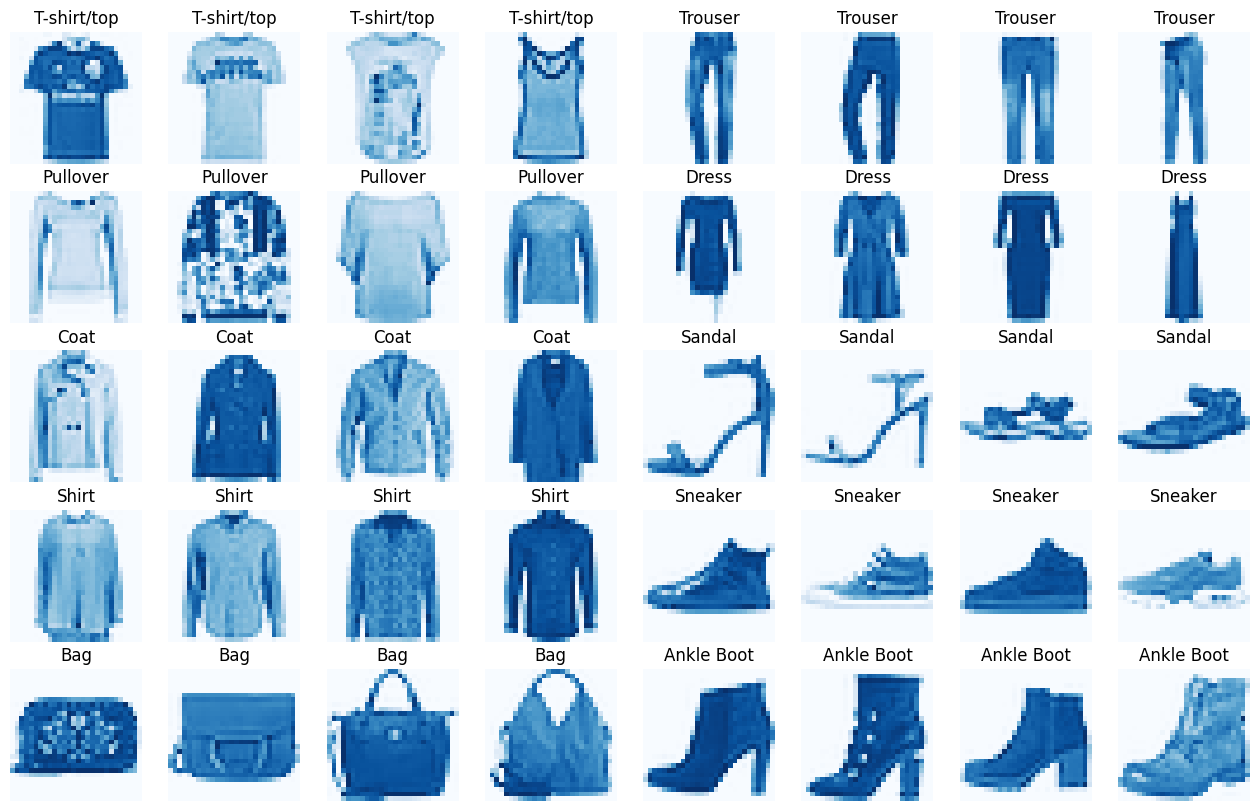

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# **Data pre processing**

**reshape the columns from (784) to (28,28,1). We also save label (target) feature as a separate vector**

In [ ]:
# ipython-input-28-34426ff6f677
#!pip install tensorflow
import tensorflow as tf # Import tensorflow

# data preprocessing
def data_preprocessing(raw):
    # Use tf.keras.utils.to_categorical instead of keras.utils.to_categorical
    out_y = tf.keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

**Split The Data Set**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


<ipython-input-13-51b7313f9c27>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




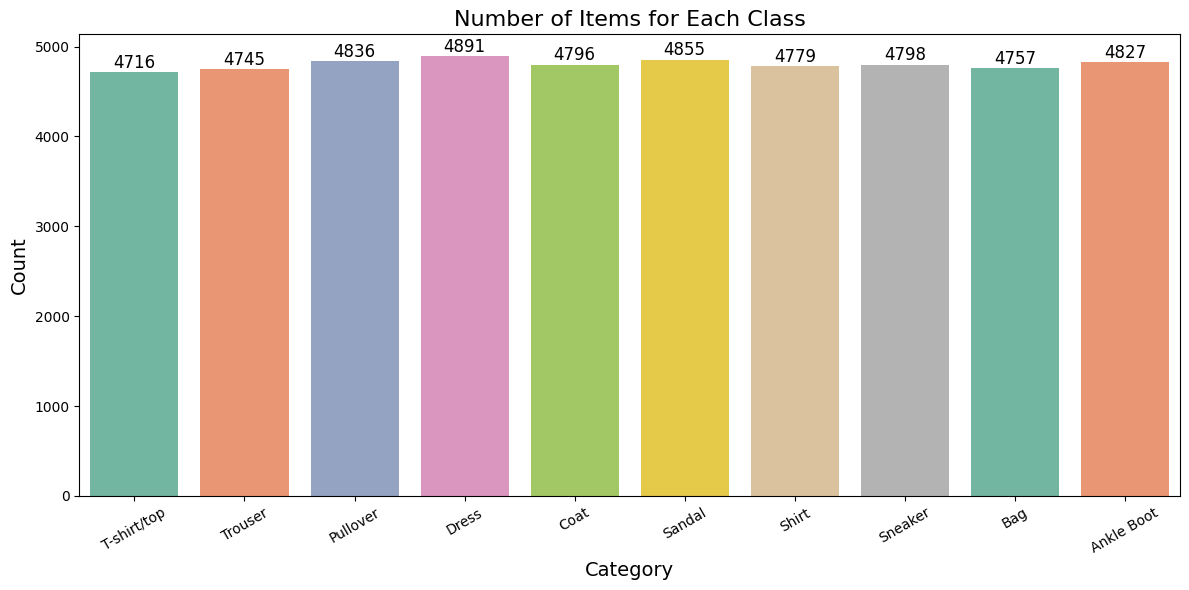

Class Distribution:

T-shirt/top         :   4716 samples or 9.83%
Trouser             :   4745 samples or 9.89%
Pullover            :   4836 samples or 10.08%
Dress               :   4891 samples or 10.19%
Coat                :   4796 samples or 9.99%
Sandal              :   4855 samples or 10.11%
Shirt               :   4779 samples or 9.96%
Sneaker             :   4798 samples or 10.00%
Bag                 :   4757 samples or 9.91%
Ankle Boot          :   4827 samples or 10.06%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def plot_count_per_class(yd):
    # Convert y_train to DataFrame and count labels
    ydf = pd.DataFrame(yd, columns=['label'])
    label_counts = ydf['label'].value_counts().sort_index()

    # Plot the count of each class with a clearer color palette
    plt.figure(figsize=(12, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")

    # Set titles and labels
    plt.title("Number of Items for Each Class", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(ticks=np.arange(10), labels=[labels[i] for i in range(10)], rotation=30)

    # Annotate each bar with the count
    for i, count in enumerate(label_counts.values):
        plt.text(i, count + 5, f"{count}", ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts().sort_index()

    # Get total number of samples
    total_samples = len(yd)

    # Count the number of items in each class and print distribution
    print("Class Distribution:\n")
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} samples or {:.2f}%".format(label, count, percent))

# Convert y_train to class indices and visualize
plot_count_per_class(np.argmax(y_train, axis=1))
get_count_per_class(np.argmax(y_train, axis=1))


<ipython-input-13-51b7313f9c27>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




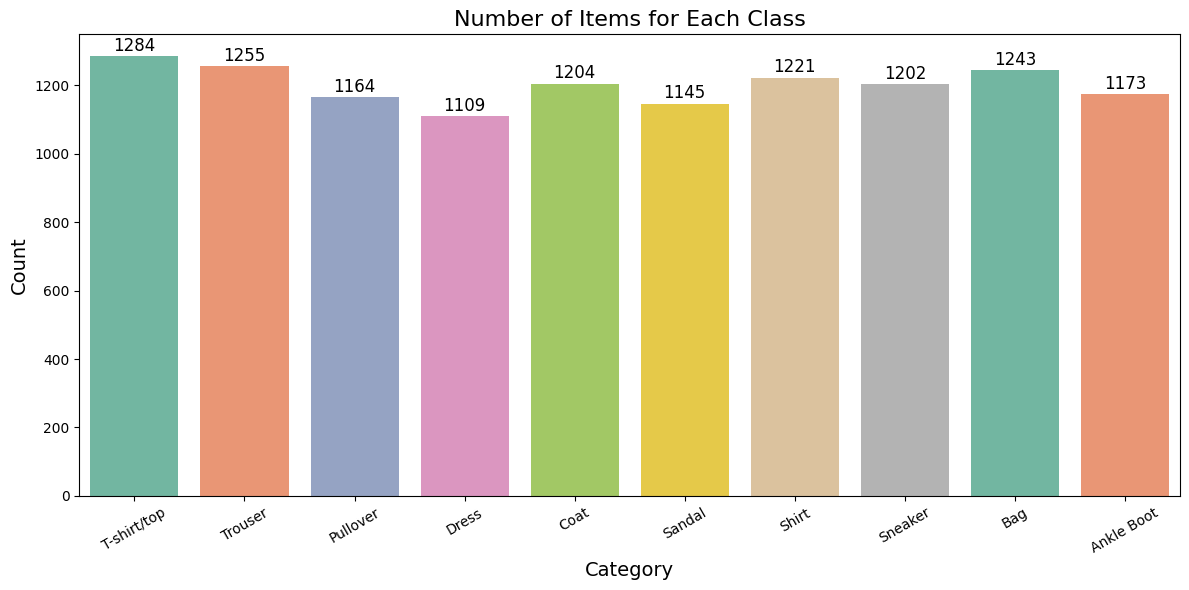

Class Distribution:

T-shirt/top         :   1284 samples or 10.70%
Trouser             :   1255 samples or 10.46%
Pullover            :   1164 samples or 9.70%
Dress               :   1109 samples or 9.24%
Coat                :   1204 samples or 10.03%
Sandal              :   1145 samples or 9.54%
Shirt               :   1221 samples or 10.17%
Sneaker             :   1202 samples or 10.02%
Bag                 :   1243 samples or 10.36%
Ankle Boot          :   1173 samples or 9.78%


In [ ]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

# **Build The Model**

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

# Setup

In [ ]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: ke

In [ ]:
!pip install tensorflow==2.12

  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
  Attempting uninstall: tensorboard
    Fou

# Train

In [17]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.7293 - loss: 0.7579 - val_accuracy: 0.8688 - val_loss: 0.3691
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.8679 - loss: 0.3647 - val_accuracy: 0.8826 - val_loss: 0.3387
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.8927 - loss: 0.2962 - val_accuracy: 0.8911 - val_loss: 0.3013
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9062 - loss: 0.2584 - val_accuracy: 0.8898 - val_loss: 0.2963
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.9153 - loss: 0.2355 - val_accuracy: 0.9075 - val_loss: 0.2602
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.9261 - loss: 0.2023 - val_accuracy: 0.9137 - val_loss: 0.2579
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.9302 - loss: 0.1887 - val_accuracy: 0.9057 - val_loss: 0.2744
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.9367 - loss: 0

# **Test prediction accuracy**

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7098392844200134
Test accuracy: 0.9099000096321106


# **Validation**

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set Plotly to render in Colab
pio.renderers.default = "colab"

def create_trace(x, y, ylabel, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=ylabel,
        line=dict(color=color, width=2),  # Line width for better visibility
        mode="lines",
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training Accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training Loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "Magenta")

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'),
        horizontal_spacing=0.1
    )

    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    fig.update_layout(
        title="Model Training and Validation Metrics",
        xaxis=dict(title="Epoch"),
        xaxis2=dict(title="Epoch"),
        yaxis=dict(title="Accuracy", range=[0, 1]),
        yaxis2=dict(title="Loss"),
        height=500,
        width=1000,
        showlegend=True,
        plot_bgcolor="rgba(245, 245, 245, 0.8)"
    )

    fig.update_xaxes(title_text="Epoch", row=1, col=1)
    fig.update_xaxes(title_text="Epoch", row=1, col=2)
    fig.update_yaxes(title_text="Accuracy", row=1, col=1)
    fig.update_yaxes(title_text="Loss", row=1, col=2)

    pio.show(fig)  # Display the figure explicitly in Colab

# Call the function
plot_accuracy_and_loss(train_model)


# **Solve OverFitting**

**Add Dropout Layers**

In [20]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

# RE train The Model

In [22]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 153ms/step - accuracy: 0.5896 - loss: 1.1099 - val_accuracy: 0.8178 - val_loss: 0.4889
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 142ms/step - accuracy: 0.8098 - loss: 0.5119 - val_accuracy: 0.8634 - val_loss: 0.3820
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.8455 - loss: 0.4246 - val_accuracy: 0.8777 - val_loss: 0.3337
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.8604 - loss: 0.3765 - val_accuracy: 0.8913 - val_loss: 0.3022
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.8731 - loss: 0.3484 - val_accuracy: 0.8960 - val_loss: 0.2869
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.8813 - loss: 0.3261 - val_accuracy: 0.8981 - val_loss: 0.2813
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.8870 - loss: 0.3086 - val_accuracy: 0.9014 - val_loss: 0.2729
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step - accuracy: 0.8930 - loss: 0

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set Plotly to render in Colab
pio.renderers.default = "colab"

def create_trace(x, y, ylabel, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=ylabel,
        line=dict(color=color, width=2),  # Line width for better visibility
        mode="lines",
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training Accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training Loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "Magenta")

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'),
        horizontal_spacing=0.1
    )

    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    fig.update_layout(
        title="Model Training and Validation Metrics",
        xaxis=dict(title="Epoch"),
        xaxis2=dict(title="Epoch"),
        yaxis=dict(title="Accuracy", range=[0, 1]),
        yaxis2=dict(title="Loss"),
        height=500,
        width=1000,
        showlegend=True,
        plot_bgcolor="rgba(245, 245, 245, 0.8)"
    )

    fig.update_xaxes(title_text="Epoch", row=1, col=1)
    fig.update_xaxes(title_text="Epoch", row=1, col=2)
    fig.update_yaxes(title_text="Accuracy", row=1, col=1)
    fig.update_yaxes(title_text="Loss", row=1, col=2)

    pio.show(fig)  # Display the figure explicitly in Colab

# Call the function
plot_accuracy_and_loss(train_model)


# **accuracy with the new model**

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20243553817272186
Test accuracy: 0.9279999732971191


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step

Class-wise Correct and Incorrect Predictions:
Class           Correct    Wrong     
T-shirt/top     863        137       
Trouser         985        15        
Pullover        880        120       
Dress           950        50        
Coat            895        105       
Sandal          974        26        
Shirt           795        205       
Sneaker         974        26        
Bag             986        14        
Ankle Boot      978        22        

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.86      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.88      0.90      1000
       Dress       0.91      0.95      0.93      1000
        Coat       0.89      0.90      0.89      1000
      Sandal       1.00      0.97      0.98      1000
       Shirt       0.78      0.80      0.79      1000
     Sneaker       0.96      0.97   

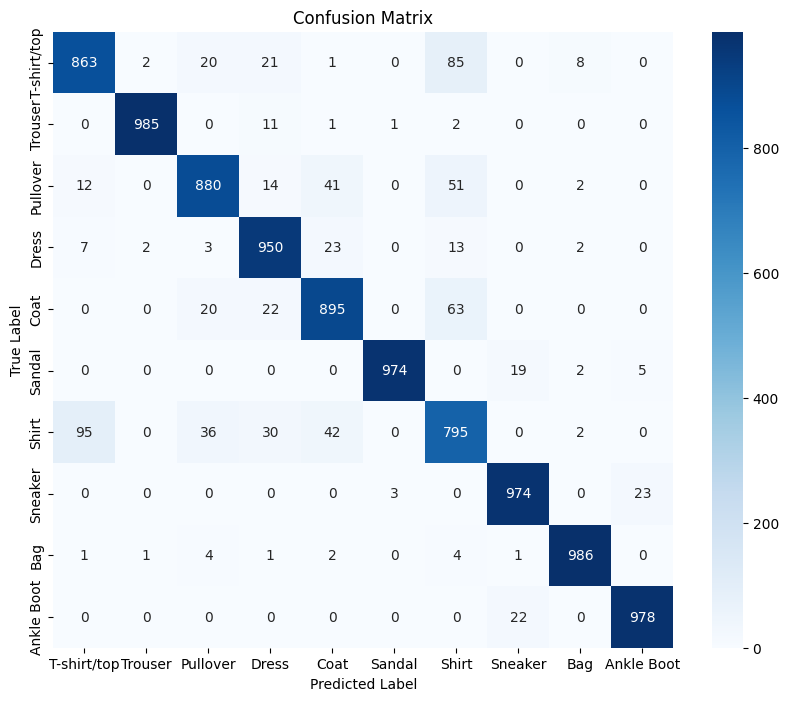

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to display correct and incorrect predictions per class and confusion matrix
def evaluate_model(model, X_test, y_test, labels):
    # Predict the classes for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class index
    y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class index

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Display the number of correct and incorrect predictions for each class
    print("\nClass-wise Correct and Incorrect Predictions:")
    print(f"{'Class':<15} {'Correct':<10} {'Wrong':<10}")
    correct_per_class = cm.diagonal()
    wrong_per_class = cm.sum(axis=1) - correct_per_class
    for i in range(len(labels)):
        print(f"{labels[i]:<15} {correct_per_class[i]:<10} {wrong_per_class[i]:<10}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=list(labels.values())))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels.values()), yticklabels=list(labels.values()))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Call the function to evaluate the model and display the confusion matrix
evaluate_model(model, X_test, y_test, labels)
